In [30]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [31]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [32]:
# some info about the data set

In [49]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [34]:
# Cabin column has a lot of null values.

In [41]:
# Who were the passengers on the titanic


## Ratio of male to female passengers:

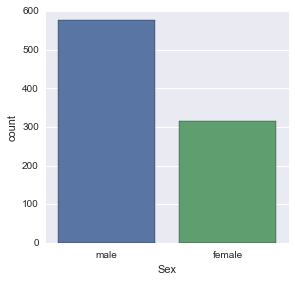

In [47]:
sns.factorplot('Sex', data=titanic_df, kind='count')

## Count by class:

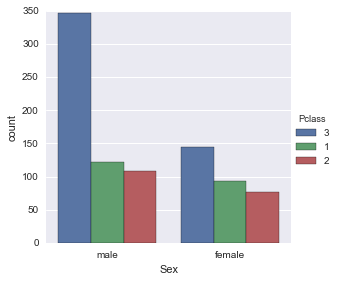

In [48]:
sns.factorplot('Sex', data=titanic_df, kind='count', hue='Pclass')

In [51]:
# Most of the males and female are in third class.

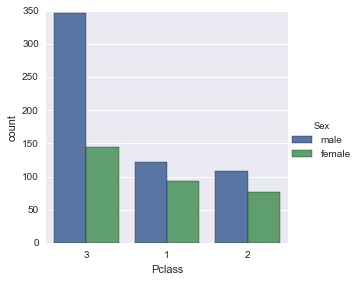

In [52]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Sex')

## Separating data into male, female and children:

In [55]:
# creating a function to separate into three categories.
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex


In [56]:
# create a  new column by applying the function on 'Age', and 'Sex' column
titanic_df['person'] = titanic_df[ ['Age', 'Sex']].apply(male_female_child, axis=1)

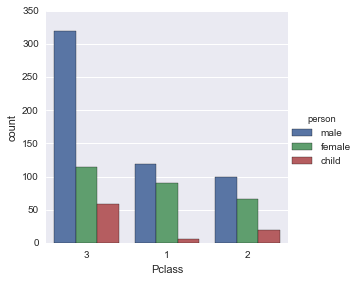

In [62]:
sns.factorplot('Pclass', data = titanic_df, kind='count', hue='person')

In [67]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

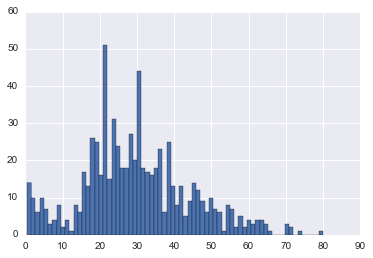

In [63]:
titanic_df['Age'].hist(bins=70)

## The mean age:

In [65]:
titanic_df['Age'].mean()

29.69911764705882

## Classifiying passengers according to cabin level.

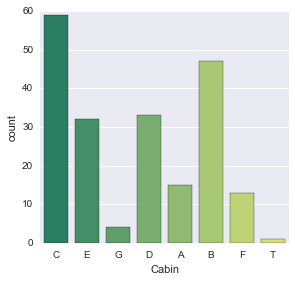

In [89]:
# Creating a list of the first character of the cabin string.
deck = titanic_df['Cabin'].dropna()
levels = []


for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data=cabin_df, kind='count', palette='summer')


In [90]:
## Classifying passengers according to location of departure.

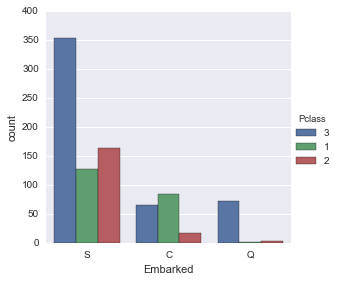

In [92]:
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', kind='count')

In [93]:
# In Queenstown, all the people are of third-class socio-economic level.

## Classifying passengers into single and family person:

In [112]:
# Passenger is alone when SibSp and Parch entries are 0.
titanic_df['Alone'] = (titanic_df.SibSp + titanic_df.Parch) >= 1
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [113]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


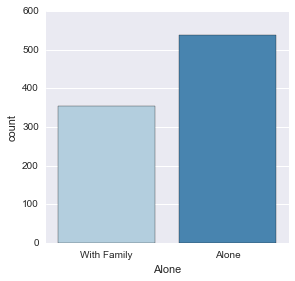

In [116]:
sns.factorplot('Alone', data =titanic_df, palette = 'Blues', kind='count')

## More number of passengers were alone.

## Number of survivors:

In [117]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1:'yes' })
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With Family,yes


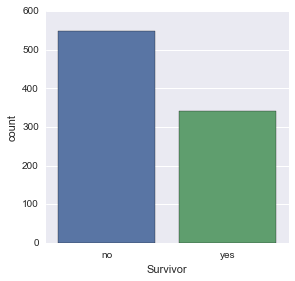

In [118]:
sns.factorplot('Survivor', data=titanic_df, kind='count')

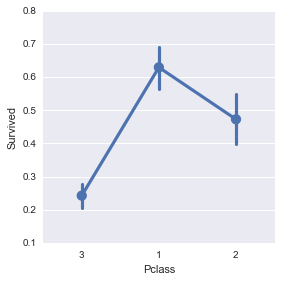

In [124]:
sns.factorplot('Pclass', 'Survived' ,data=titanic_df)

In [125]:
# less number of people in 3rd class survived.